In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('stroke_data.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


*This is our given data and the task is to predict the probability of stroke in a person , given their lifestyle ,
medical history, age , gender etc*

**EXPLORATORY DATA ANALYSIS - The following section is aimed at exploring the given data and finding out meaningful relationships 
among the various parameters to predict stroke probability in a person. This also represents how the probability varies 
according to age , gender , lifestyle choice s, job type , medical conditions etc through the use of plotting tools of 
seaborn library like graphs and charts to convey the conclusions better and in a visually appealing manner**

*Before we proceed to EDA , data cleaning has been done to examine if any null values are present in any column. If null values
are present , the empty elements are filled with 0 or NA to reduce discrepancies in EDA.*

In [ ]:
df.isnull().sum()               #this gives sum of null value for each column 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

*Clearly , there are no null values in the csv file so we can readily perform EDA now*

Exploring the age column :-

***As we can see, the age column has extremely diverse values and hence it would make sense to make a new column in the 
file which groups people according to their age group. People having age 20 or 24 are likely to have the same conditions ,
so they are grouped together in a new column called "AGE GROUP"***

In [ ]:
df['AGE GROUP']=df['age'] //10

In [ ]:
df.head()          #shows updated table with the new column that was created by the name of "AGE GROUP" 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE GROUP
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,5.0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,7.0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,5.0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,7.0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,3.0


<AxesSubplot:xlabel='AGE GROUP', ylabel='stroke'>

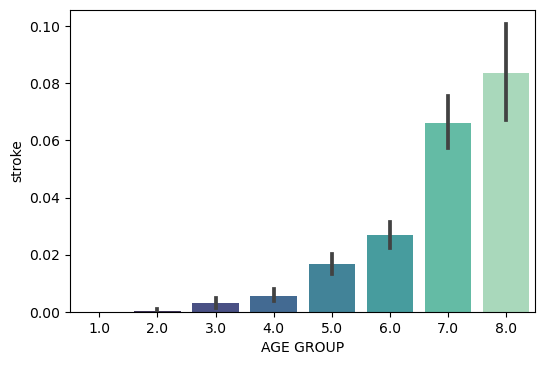

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='AGE GROUP' , y='stroke' ,data=df ,palette= 'mako')

This is a bar graph with "age group" column as x axis and "stroke" as y axis. The bar graph shows that the greatest 
probability for stroke occurs in the age group of 80-89 years and this possibility gradually increases with a persons age.

*Exploring the relationship between age and stroke probability across the various genders*

<AxesSubplot:xlabel='AGE GROUP', ylabel='stroke'>

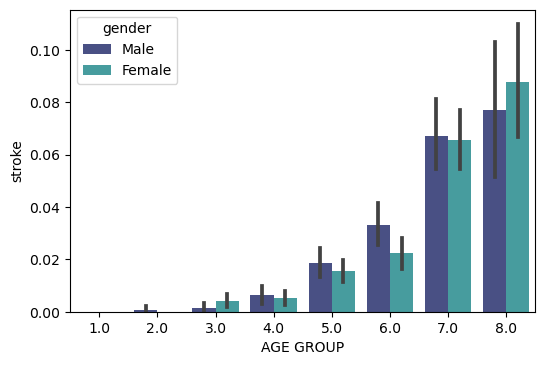

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='AGE GROUP' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

In almost all age groups , men are at greater risk than women , except for the age group 80-89 years where women are at a 
significantly greater risk than men.

*Exploring the relationship between the gender and the stroke probability*

<AxesSubplot:xlabel='gender', ylabel='stroke'>

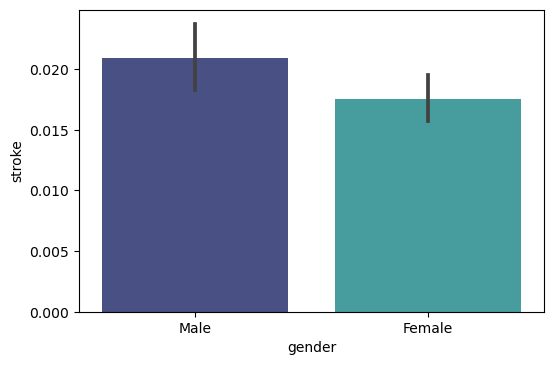

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='gender' , y='stroke' ,data=df ,palette= 'mako')

Clearly , male patients are more likely to suffer from a stroke than female patients . Probability for males to suffera  stroke 
is above 0.02 while the probability for females is around 0.017

*Exploring the relation between hypertension and stroke possibility*

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

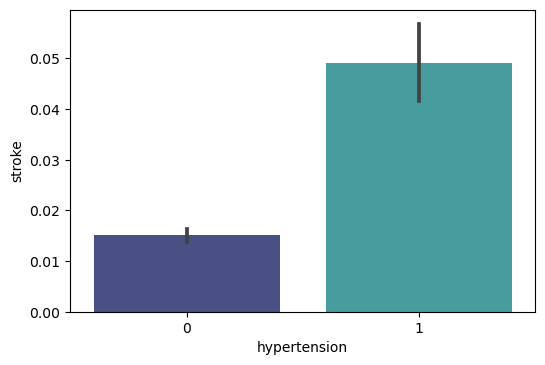

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='hypertension' , y='stroke' ,data=df ,palette= 'mako')

The conclusion drawn from the above bar graph is that people having hypertension are more probable to suffer a stroke than
people who do not suffer from it. 
Here 0 indicates hypertension not present
      and 1 indicates hypertension present

*Exploring the relation between hypertension and stroke possibility on the basis of gender of patient*

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

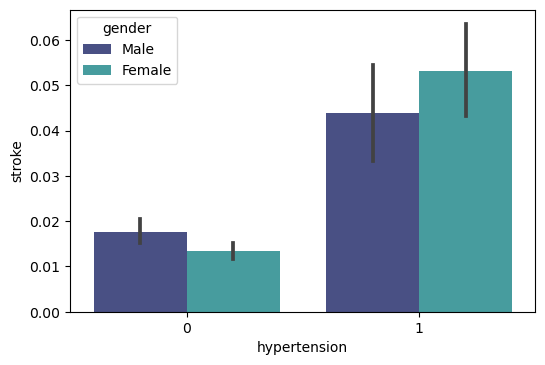

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='hypertension' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

Female patients of hypertension more probable to suffer a stroke than male patients. Probability for female hypertension 
patients is above 0.05 whereas for males it is around 0.04. 
In case hypertension is absent , men are more likely to suffer from a stroke than females.

*Exploring the relation between hypertension and stroke possibility on the basis of age group of patient*



<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

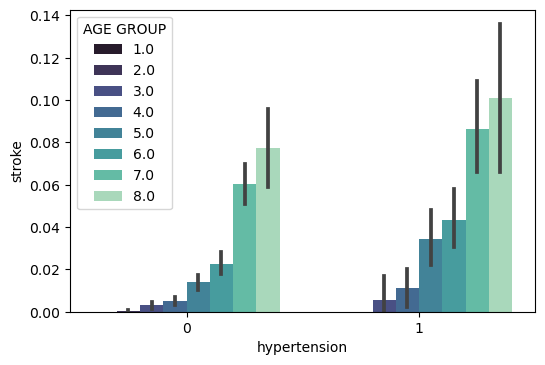

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='hypertension' , y='stroke' ,data=df ,palette= 'mako' , hue ='AGE GROUP')

People who do not have hypertension , aged 80-89 years are more at risk from a stroke than patients in their 50's or 60's
but suffering from hypertension

*Exploring the relation between heart disease and stroke possibility*

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

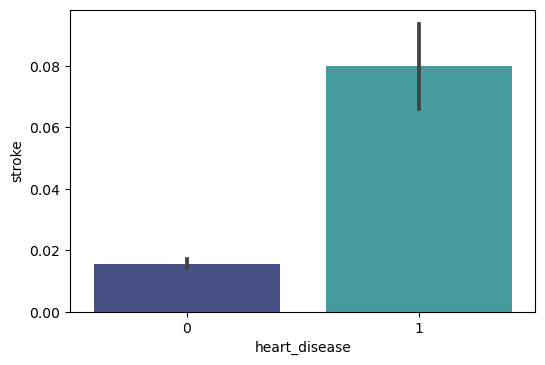

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='heart_disease' , y='stroke' ,data=df ,palette= 'mako')

People having heart disease are much more likely to suffer a stroke than people not having heart disease. Probability of a person having heart disease to suffer froma stroke is around 0.08 whereas the fraction is below 0.02 otherwise .
This indicates a strong correlation between heart disease and stroke probability.

*Exploring the relation between heart disease and stroke possibility on the basis of gender*

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

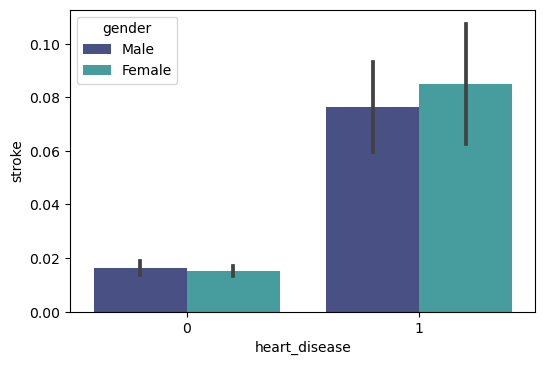

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='heart_disease' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

The above graph indicates that females having a heart disease are more likely to suffer from a stroke than men having the heart disease. 

*Exploring the relation between the combination of heart disease and hypertension on the stroke probability*

**Creating a new column combined with data from column hypertension and heartdisease and putting
 1 where a patient has both , 0 otherwise.**
 

In [ ]:
## finding intersection of two col heart disease and hypertension 
df['combined'] =df['hypertension'] * df['heart_disease']

In [ ]:
df['combined'].unique()     #seeing all possible values of column "combined"

array([0, 1], dtype=int64)

In [ ]:
df.head()      #new column "combined" has been added

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AGE GROUP,combined
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,5.0,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,7.0,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,5.0,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,7.0,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,3.0,0


<AxesSubplot:xlabel='combined', ylabel='stroke'>

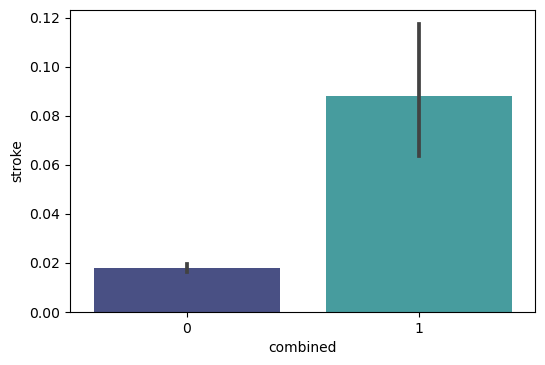

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='combined' , y='stroke' ,data=df ,palette= 'mako')

Thus it shows that people having both heart disease and hypertension are much more likely to suffer a stroke (0.08) than people who do not have these conditions or have only one of them. 

<AxesSubplot:xlabel='combined', ylabel='stroke'>

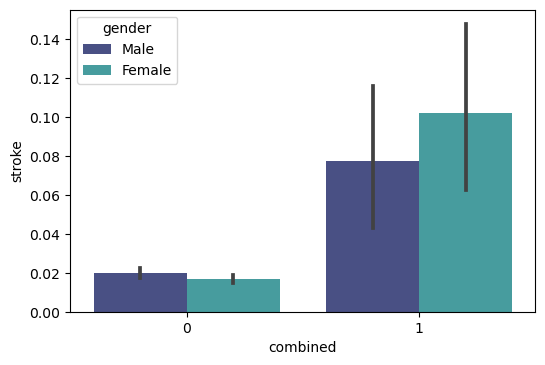

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='combined' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

The above bar graph indicates that if both heart disease and hypertension is present , then females are at higher risk(0.11) 
than males(0.08 approx). In cases where only one disease is present or none is present , men are at greater risk of stroke.  

*Exploring the relationship between marital status and stroke probability*

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

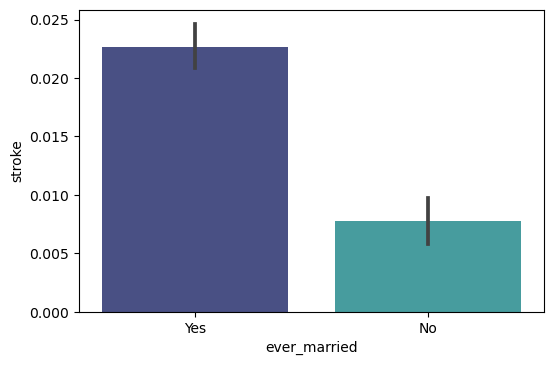

In [ ]:
plt.figure(dpi=100)
sns.barplot(x=df['ever_married'], y= df['stroke'] , palette = 'mako')

The above graph indicates that married people are more probable(0.023) to suffer from a stroke than unmarried people 
where stroke probability is around (0.06) .

*Exploring the relationship between marital status and stroke probability , gender-wise*

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

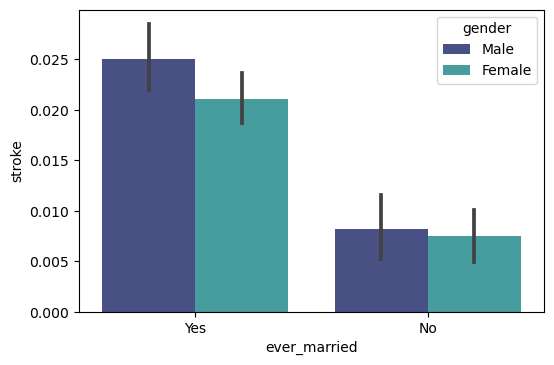

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='ever_married' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

The conclusions drawn from this graph are as follows. 
Men are more likely to suffer a stroke than women , whether married or unmarried. Unmarried people  significantly 
less likely to suffer from
a stroke.

*Exploring relationship between work type and stroke*

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

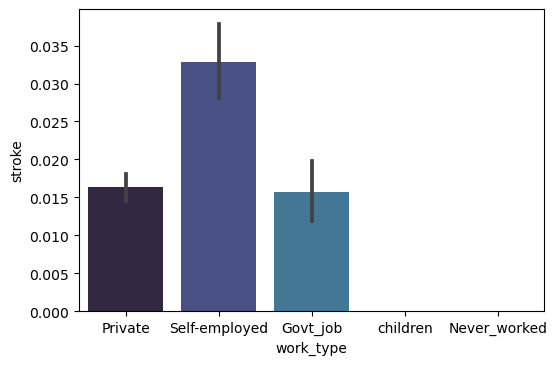

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='work_type' , y='stroke' ,data=df ,palette= 'mako')

The bar graph shows that self employed people have the greatest probability of a stroke (0.033) , followed by people working in 
the private sector(probability is 0.016 approx). People having government jobs least likely to suffer from a stroke 
among all the peole who are working. Probability of children and people who have never been employed is very less (close to 0.0)

*Exploring relationship between work type and stroke on the basis of gender*

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

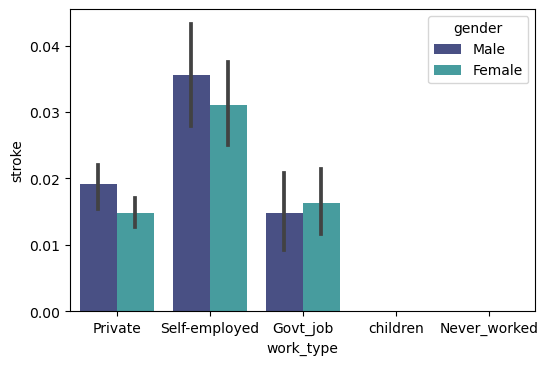

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='work_type' , y='stroke' ,data=df ,palette= 'mako' , hue='gender')

Among gender and worktype men more likely to suffer from stroke in every work type 
other than govt job where females are at greater risk

*Exploring relationship between residence type and stroke probability*

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

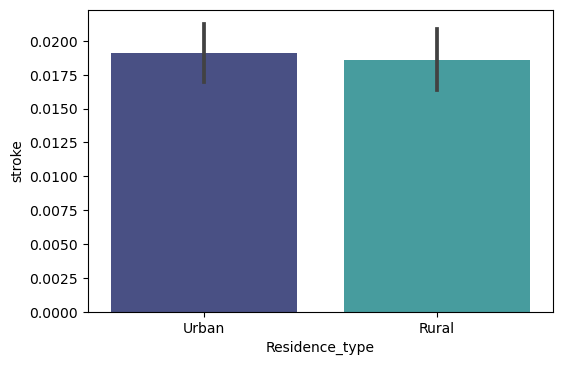

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='Residence_type' , y='stroke' ,data=df ,palette= 'mako' )

It can be clearly seen that people living in rural areas are at slightly lower risk than urban city-dwellers.

*Exploring relationship between stroke and smoking status of patients*

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

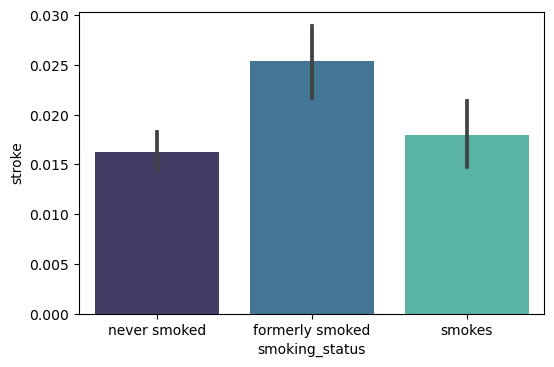

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='smoking_status' ,y='stroke' ,data=df ,palette='mako')

Thus it can be concluded that people who formerly smoked are at greatest risk followed by active smokers and 
people who have never smoked.

*Exploring relationship between stroke and smoking status of patients on the basis of gender*



<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

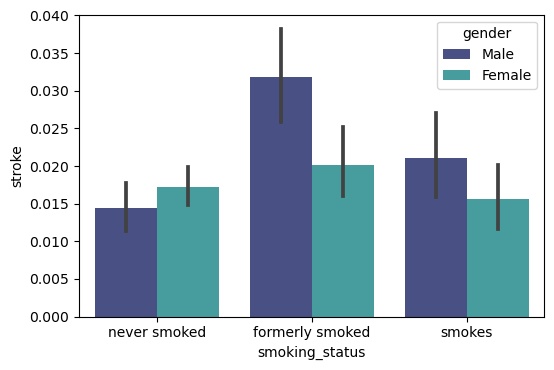

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='smoking_status' ,y='stroke' ,data=df ,palette='mako' ,hue='gender')

Females at lesser risk than men in general , but in case of never smoked , females are at gretaer risk than men.
 Probability of stroke is more in former smokers than current active smokers is a notable conclusion 

*Study between residence type and stroke on the basis of gender*

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

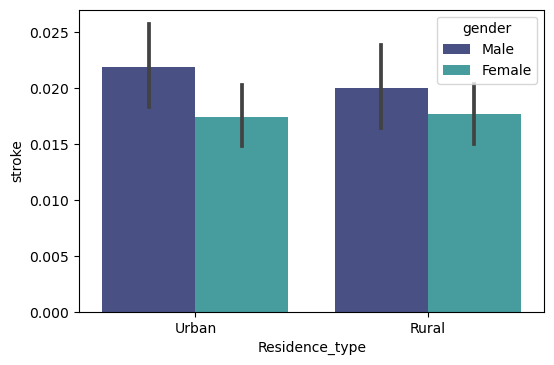

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='Residence_type', y= 'stroke' , data=df, palette='mako' , hue='gender')

Urban males are at the greatest risk , followed by rural men. However, urban women and rural women have almost the same 
possibility of stroke

*Relation between stroke and residence type on the basis of smoking status*

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

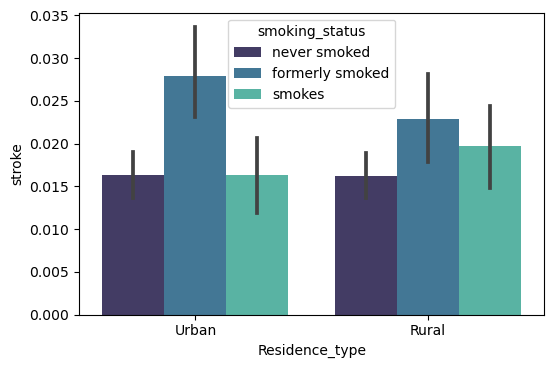

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='Residence_type', y= 'stroke' , data=df, palette='mako' , hue='smoking_status')

This graph gives us some interesting insights. Urban people who smoke are at greatest risk in comparison to the other categories.
However , the surprising fact is that rural people who formerly smoked are at much greater risk than urban people who currently 
smoke. Rural people who smoke are at greater risk than their urban counterparts.

*Exploring the relation between bmi and stroke*

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

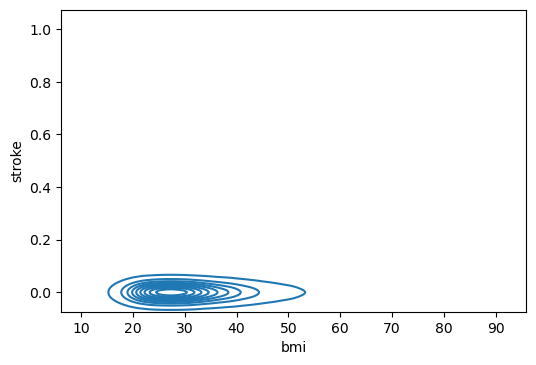

In [ ]:
plt.figure(dpi=100)
sns.kdeplot(x='bmi' , y='stroke' , data=df)

This shows that people having bmi above 27(approx) are the most likely to suffer from stroke

*Exploring the relationship between stroke and average glucose level*

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

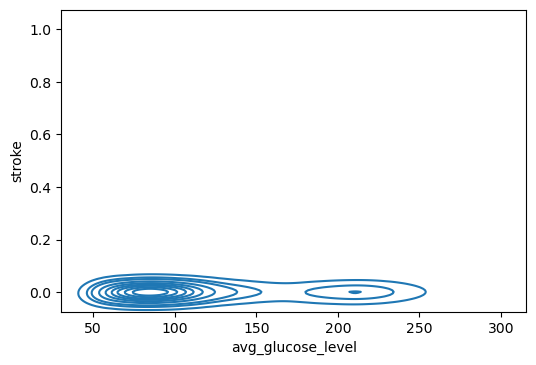

In [ ]:
plt.figure(dpi=100)
sns.kdeplot(x='avg_glucose_level' , y='stroke' , data=df)

In [ ]:
#converting the continuous bmi column to a categorical column and grouping according to values

In [ ]:
category=pd.cut(df.bmi , bins=[0,19,25,100] , labels=['underweight' ,'normal' ,'overweight'])
df.insert(8,'bmi_group',category)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi_group,bmi,smoking_status,stroke,AGE GROUP,combined
0,Male,58.0,1,0,Yes,Private,Urban,87.96,overweight,39.2,never smoked,0,5.0,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,overweight,35.9,formerly smoked,0,7.0,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,underweight,17.7,formerly smoked,0,5.0,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,overweight,27.0,never smoked,0,7.0,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,overweight,32.3,smokes,0,3.0,0


In [ ]:
df.isnull().sum()              #checking for null values in new column

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi_group            0
bmi                  0
smoking_status       0
stroke               0
AGE GROUP            0
combined             0
dtype: int64

In [ ]:
df.sort_values('bmi')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi_group,bmi,smoking_status,stroke,AGE GROUP,combined
17829,Male,39.0,0,0,Yes,Private,Rural,75.90,underweight,10.1,smokes,0,3.0,0
9435,Female,71.0,0,0,Yes,Govt_job,Rural,59.13,underweight,10.8,never smoked,0,7.0,0
18295,Male,49.0,0,0,Yes,Private,Urban,81.50,underweight,11.0,never smoked,0,4.0,0
1325,Male,40.0,0,0,Yes,Private,Rural,60.96,underweight,11.5,never smoked,0,4.0,0
24784,Female,44.0,0,0,Yes,Private,Urban,162.04,underweight,12.5,never smoked,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Female,23.0,1,0,No,Private,Urban,70.03,overweight,78.0,smokes,0,2.0,0
20539,Female,34.0,0,0,No,Private,Urban,199.13,overweight,80.1,never smoked,0,3.0,0
23306,Female,47.0,1,0,Yes,Private,Urban,238.47,overweight,82.7,never smoked,0,4.0,0
28869,Male,78.0,1,0,Yes,Private,Rural,135.73,overweight,89.0,never smoked,0,7.0,0


*Exploring the relationship between bmi group and stroke*

<AxesSubplot:xlabel='bmi_group', ylabel='stroke'>

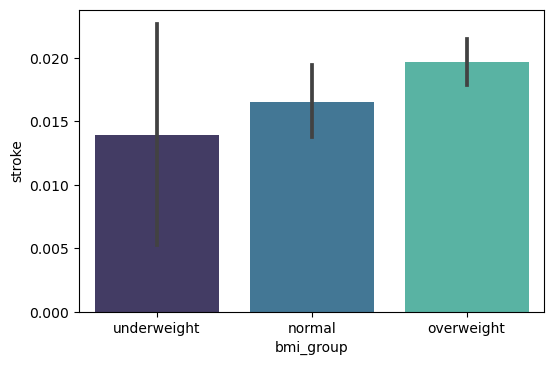

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='bmi_group' , y='stroke' , data=df , palette='mako')

From the graph it can be concluded that as bmi increases , probability of stroke increases.

**Converting avg glucose level column from continuous to categorical**

In [ ]:
category2=pd.cut(df.avg_glucose_level , bins=[0,140,200,1000] , labels=['normal' ,'prediabetic' ,'diabetic'])
df.insert(9,'glucose_group',category2)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi_group,glucose_group,bmi,smoking_status,stroke,AGE GROUP,combined
0,Male,58.0,1,0,Yes,Private,Urban,87.96,overweight,normal,39.2,never smoked,0,5.0,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,overweight,normal,35.9,formerly smoked,0,7.0,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,underweight,normal,17.7,formerly smoked,0,5.0,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,overweight,diabetic,27.0,never smoked,0,7.0,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,overweight,normal,32.3,smokes,0,3.0,0


In [ ]:
df.isnull().sum()                         #checking for null values in new column

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi_group            0
glucose_group        0
bmi                  0
smoking_status       0
stroke               0
AGE GROUP            0
combined             0
dtype: int64

**no null values in new column**

*Establishing a relationship between avg glucose level groups and stroke*

<AxesSubplot:xlabel='glucose_group', ylabel='stroke'>

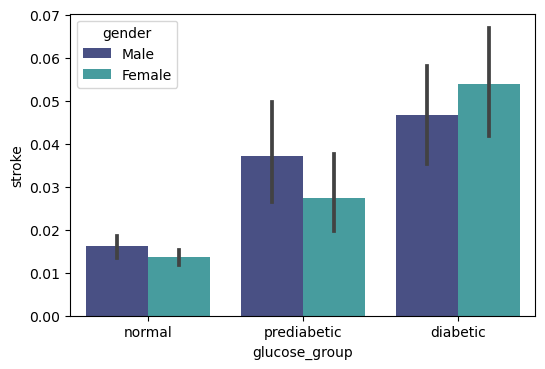

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='glucose_group' , y='stroke' , data=df , palette='mako' , hue='gender')

Probability of stroke highest in diabetic group.In the diabetic group , females are at the greatest risk of stroke.
In the prediabetic group, males are at a greater possibility of suffering from a stroke.

<AxesSubplot:xlabel='glucose_group', ylabel='stroke'>

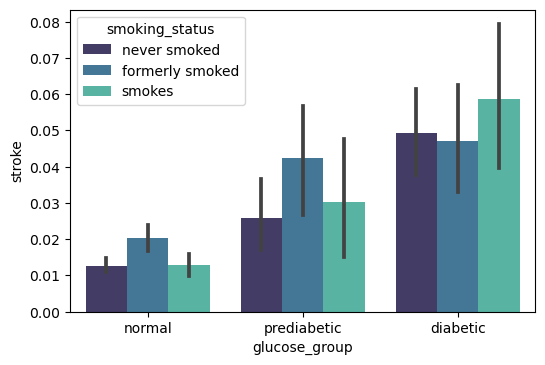

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='glucose_group' , y='stroke' , data=df , palette='mako' , hue='smoking_status')

## Feature Selection

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [ ]:
X_train[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi_group,glucose_group,bmi,smoking_status,AGE GROUP,combined
5112,Female,79.0,1,0,Yes,Self-employed,Urban,66.83,normal,normal,19.8,never smoked,7.0,0
13166,Male,32.0,0,0,Yes,Govt_job,Urban,110.63,overweight,normal,33.1,never smoked,3.0,0
5197,Female,64.0,0,0,Yes,Private,Urban,109.51,overweight,normal,25.4,never smoked,6.0,0
25891,Male,24.0,0,0,No,Private,Rural,95.93,normal,normal,23.6,smokes,2.0,0
755,Female,56.0,0,1,Yes,Private,Rural,64.66,overweight,normal,26.7,formerly smoked,5.0,0


In [ ]:
y_train[:5]

5112     0
13166    0
5197     0
25891    0
755      0
Name: stroke, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter=100)

In [ ]:
log_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'